In [104]:
# ----------------------------------------------- #
# Import & Load CSVs
# ----------------------------------------------- #
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

woodside_df = pd.read_csv('./data/2023/cleaned/456/456_61St-Woodside_2023_cleaned.csv')
bryant_df = pd.read_csv('./data/2023/cleaned/609/609_BryantPk5Av_2023_cleaned.csv')
dekalb_df = pd.read_csv('./data/2023/cleaned/127/127_Dekalb_2023_cleaned.csv')
jay_df = pd.read_csv('./data/2023/cleaned/636/636_JayStMetrotech_2023_cleaned.csv')



In [105]:
# ----------------------------------------------- #
# JSON + FORMATTING
# ----------------------------------------------- #
import json

# -------- CHANGE THESE ----------

to_json_df = jay_df
save_string = "./data/2023/636.json"

# --------------------------------

to_json_df = to_json_df.drop(columns = ["transit_timestamp","month", "day", "transfers"])
to_json_df[:10]

,year,dayofweek,hour,ridership,station_complex_id,station_complex,borough
0,2023,6,0,435.0,636,"Jay St-MetroTech (A,C,F,R)",Brooklyn
1,2023,6,1,315.0,636,"Jay St-MetroTech (A,C,F,R)",Brooklyn
2,2023,6,2,185.0,636,"Jay St-MetroTech (A,C,F,R)",Brooklyn
3,2023,6,3,95.0,636,"Jay St-MetroTech (A,C,F,R)",Brooklyn
4,2023,6,4,40.0,636,"Jay St-MetroTech (A,C,F,R)",Brooklyn
5,2023,6,5,50.0,636,"Jay St-MetroTech (A,C,F,R)",Brooklyn
6,2023,6,6,71.0,636,"Jay St-MetroTech (A,C,F,R)",Brooklyn
7,2023,6,7,130.0,636,"Jay St-MetroTech (A,C,F,R)",Brooklyn
8,2023,6,8,159.0,636,"Jay St-MetroTech (A,C,F,R)",Brooklyn
9,2023,6,9,211.0,636,"Jay St-MetroTech (A,C,F,R)",Brooklyn


In [106]:
# reduce to 24hours x 7 days of week
to_json_df =  to_json_df.groupby(by=["year", "dayofweek", "hour", "station_complex", "station_complex_id", "borough"]).mean().reset_index()

to_json_df

,year,dayofweek,hour,station_complex,station_complex_id,borough,ridership
0,2023,0,0,"Jay St-MetroTech (A,C,F,R)",636,Brooklyn,89.596154
1,2023,0,1,"Jay St-MetroTech (A,C,F,R)",636,Brooklyn,30.500000
2,2023,0,2,"Jay St-MetroTech (A,C,F,R)",636,Brooklyn,19.942308
3,2023,0,3,"Jay St-MetroTech (A,C,F,R)",636,Brooklyn,17.326923
4,2023,0,4,"Jay St-MetroTech (A,C,F,R)",636,Brooklyn,39.538462
...,...,...,...,...,...,...,...
163,2023,6,19,"Jay St-MetroTech (A,C,F,R)",636,Brooklyn,544.339623
164,2023,6,20,"Jay St-MetroTech (A,C,F,R)",636,Brooklyn,418.773585
165,2023,6,21,"Jay St-MetroTech (A,C,F,R)",636,Brooklyn,338.226415
166,2023,6,22,"Jay St-MetroTech (A,C,F,R)",636,Brooklyn,260.849057


In [107]:
# normalize

# Calculate the sum of each group
group_sums = to_json_df.groupby(by=["year",
                             "station_complex",
                             "station_complex_id",
                             "borough",
                             "dayofweek"])['ridership'].transform('sum')

# Divide the 'value' column by the group sums
to_json_df['normalized_value'] = to_json_df['ridership'] / group_sums

to_json_df

,year,dayofweek,hour,station_complex,station_complex_id,borough,ridership,normalized_value
0,2023,0,0,"Jay St-MetroTech (A,C,F,R)",636,Brooklyn,89.596154,0.004025
1,2023,0,1,"Jay St-MetroTech (A,C,F,R)",636,Brooklyn,30.500000,0.001370
2,2023,0,2,"Jay St-MetroTech (A,C,F,R)",636,Brooklyn,19.942308,0.000896
3,2023,0,3,"Jay St-MetroTech (A,C,F,R)",636,Brooklyn,17.326923,0.000778
4,2023,0,4,"Jay St-MetroTech (A,C,F,R)",636,Brooklyn,39.538462,0.001776
...,...,...,...,...,...,...,...,...
163,2023,6,19,"Jay St-MetroTech (A,C,F,R)",636,Brooklyn,544.339623,0.053800
164,2023,6,20,"Jay St-MetroTech (A,C,F,R)",636,Brooklyn,418.773585,0.041389
165,2023,6,21,"Jay St-MetroTech (A,C,F,R)",636,Brooklyn,338.226415,0.033428
166,2023,6,22,"Jay St-MetroTech (A,C,F,R)",636,Brooklyn,260.849057,0.025781


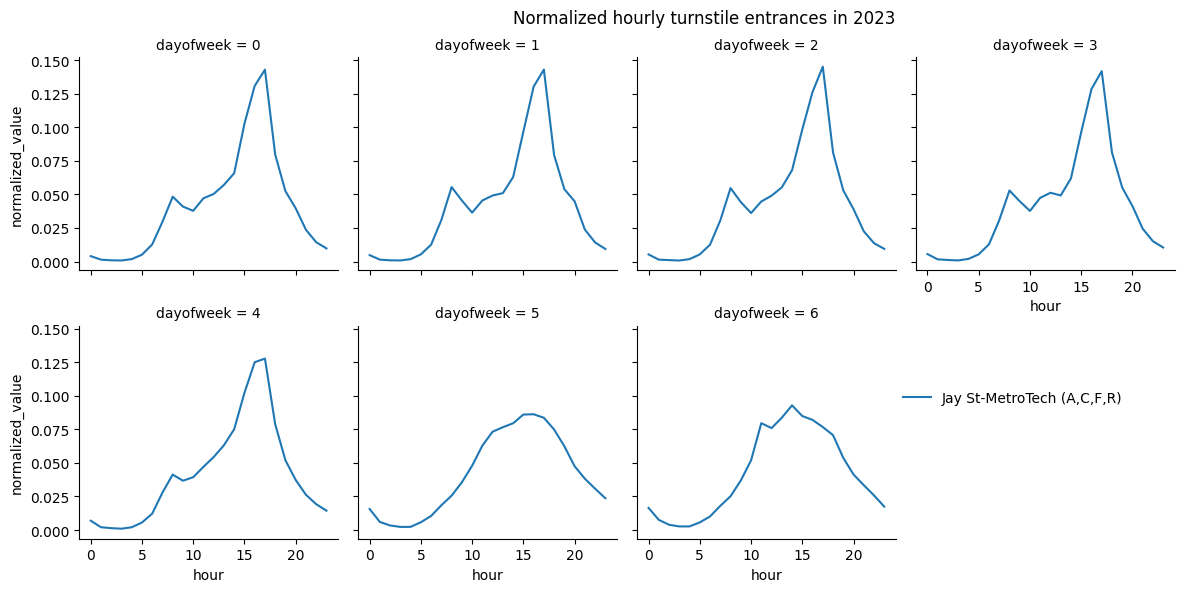

In [108]:
# ----------------------------------------------- #
# PLOT: NORMALIZED Mean Ridership, just to check
# ----------------------------------------------- #

g = sns.FacetGrid(to_json_df, col="dayofweek", col_wrap = 4)
g.map_dataframe(sns.lineplot, x="hour", y="normalized_value", hue="station_complex")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Normalized hourly turnstile entrances in 2023')
sns.move_legend(g, "lower left", bbox_to_anchor=(.63, .3))



In [109]:
# ----------------------------------------------- #
# WRITE JSON
# ----------------------------------------------- #

# Data to be written
dat = {
    "station_complex": to_json_df.loc[0, 'station_complex'],
    "station_complex_id": int(to_json_df.loc[0, 'station_complex_id']), #cannot write df types e.g. int64 to json; cast to int
    "borough": to_json_df.loc[0, 'borough'],
    "year": int(to_json_df.loc[0, 'year']),
    "ridership": {
        "0": to_json_df.loc[to_json_df['dayofweek'] == 0]['ridership'].tolist(),
        "1": to_json_df.loc[to_json_df['dayofweek'] == 1]['ridership'].tolist(),
        "2": to_json_df.loc[to_json_df['dayofweek'] == 2]['ridership'].tolist(),
        "3": to_json_df.loc[to_json_df['dayofweek'] == 3]['ridership'].tolist(),
        "4": to_json_df.loc[to_json_df['dayofweek'] == 4]['ridership'].tolist(),
        "5": to_json_df.loc[to_json_df['dayofweek'] == 5]['ridership'].tolist(),
        "6": to_json_df.loc[to_json_df['dayofweek'] == 6]['ridership'].tolist()
    },
    "ridership_norm": {
        "0": to_json_df.loc[to_json_df['dayofweek'] == 0]['normalized_value'].tolist(),
        "1": to_json_df.loc[to_json_df['dayofweek'] == 1]['normalized_value'].tolist(),
        "2": to_json_df.loc[to_json_df['dayofweek'] == 2]['normalized_value'].tolist(),
        "3": to_json_df.loc[to_json_df['dayofweek'] == 3]['normalized_value'].tolist(),
        "4": to_json_df.loc[to_json_df['dayofweek'] == 4]['normalized_value'].tolist(),
        "5": to_json_df.loc[to_json_df['dayofweek'] == 5]['normalized_value'].tolist(),
        "6": to_json_df.loc[to_json_df['dayofweek'] == 6]['normalized_value'].tolist()
    }
}
 
# Serializing json
json_object = json.dumps(dat, indent=4)
 
# Writing
with open(save_string, "w") as outfile:
    outfile.write(json_object)